
## Apuntes de la clase del 01.Marzo de 2023 Sobre esperanza y varianza para variables aleatorias

### Valor esperado

In [1]:
import sympy as sym

# define the symbols 
c = sym.symbols('c')


x_utilidad = [c-50000,  c-25000, c-12500, c]
f_x = [0.002, 0.01, 0.1, 0.888]



Utilidad esperada en función de c

In [3]:
utilidad_esperada = [x * f for x, f in zip(x_utilidad, f_x)]
utilidad_esperada

[0.002*c - 100.0, 0.01*c - 250.0, 0.1*c - 1250.0, 0.888*c]

In [4]:
type(utilidad_esperada)

list

Resovliendo la ecuación para el valrod de C tal que la esperanza sea 500

In [7]:
import sympy

# Define the equation as a function of c
c = sympy.Symbol('c')
equation = 0.002*c - 100.0 + 0.01*c - 250.0 + 0.1*c - 1250.0 + 0.888*c - 500

# Solve the equation for c
sol = sympy.solve(equation, c)

# Print the solution
print(sol[0])



2100.00000000000


### Ahora tenemos otra función

$$f(y)=\left\{\begin{matrix}
 x, & 0<x<1 \\ 
 2-x ,& 1<=x<2 \\ 
 0 ,& en otro caso & 
\end{matrix}\right.$$

Y obtenemos su media y esperanza

In [16]:
import numpy as np
from scipy.integrate import quad

def f_x(x):
    return np.piecewise(x, [(x>0) & (x<1), (x>=1) & (x<2), (x>=2)], [lambda x: x, lambda x: 2-x, 0])

##Se define la función que integrará y por lo tanto calculará la media 
def mean_f(f, a, b):
    integrand = lambda x: f(x) * x
    ## FUNCIÓN QUE REALIZA LA INTEGRACIÓN!
    return quad(integrand, a, b)[0]

##Aqui se usa/llama la función que integra y calcula media 
mean = mean_f(f_x, 0, 2)

print('La media de f(x) es: ', mean)


La media de f(x) es:  1.0


### Varianza

La distancia de cada valor de la variabl aleatoria Y a la media 
El promedio de esas distancia se dice que es la varianza, por eso es una medida de la dispersión

Entonces interpretese a la varianza como una "especie del promedio de las distancia de X con ls media Mu"

$$Var(Y) =E[(Y-\mu )^2]$$


$$Var(Y) = \sigma ^2 (y) = \int_{-\infty }^{\infty }(Y-\mu )^2 *f(y)$$

Por eso la varianza a veces se define como El valor esperado de X cuadrada menos la media elevada al cuadrado

In [17]:
import numpy as np
from scipy.integrate import quad

def f_x(x):
    return np.piecewise(x, [(x>0) & (x<1), (x>=1) & (x<2), (x>=2)], [lambda x: x, lambda x: 2-x, 0])

##Se define la función que integrará y por lo tanto calculará la media 
def var_f(f, a, b):
    integrand = lambda x: (x-mean)**2 *f(x)
    ## FUNCIÓN QUE REALIZA LA INTEGRACIÓN!
    return quad(integrand, a, b)[0]

##Aqui se usa/llama la función que integra y calcula media 
var_x = var_f(f_x, 0, 2)

print('La varianza de f(x) es: ', var_x)


La varianza de f(x) es:  0.16666666666666669


In [22]:
import math
Desv_std_x = math.sqrt(var_x)
Desv_std_x

0.408248290463863

### Tratando tema del problema 4 de la tarea 2

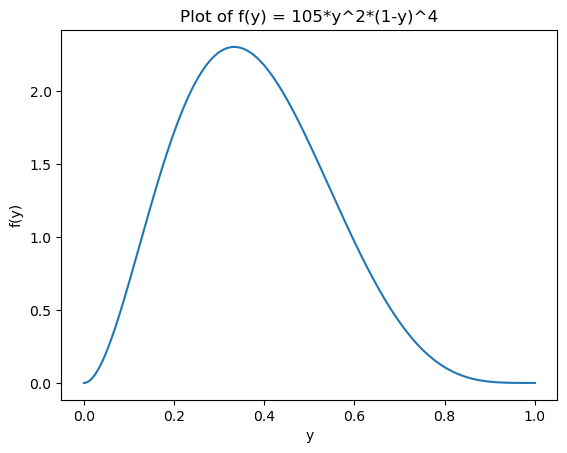

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def f(y):
    return 105 * y**2 * (1-y)**4

y = np.linspace(0, 1, 1000) # define the range of y values to plot
plt.plot(y, f(y)) # plot the function f(y)
plt.xlabel('y')
plt.ylabel('f(y)')
plt.title('Plot of f(y) = 105*y^2*(1-y)^4')
plt.show()
